# Python Movie Recommender v2

In [7]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns  
sns.set_style('dark')  
%matplotlib inline

# Read data from csv file and merge into one df

In [8]:
ratings_data = pd.read_csv("ratings_clean.csv")  

ratings_data.head()

,username,mal_id,score
0,-alquimista-,306,8
1,-alquimista-,1292,5
2,-alquimista-,47,6
3,-alquimista-,3080,8
4,-alquimista-,54,3


In [9]:
anime_names = pd.read_csv("anime_clean.csv")  
anime_names.head()  

,mal_id,title,members
0,1,Cowboy Bebop,810030
1,5,Cowboy Bebop: Tengoku no Tobira,200660
2,6,Trigun,413982
3,7,Witch Hunter Robin,80056
4,8,Bouken Ou Beet,11798


In [13]:
anime_data = pd.merge(ratings_data, anime_names, on='mal_id')
anime_data.head()  

,username,mal_id,score,title,members
0,-alquimista-,306,8,Abenobashi Mahou☆Shoutengai,61562
1,AccipiterF1,306,8,Abenobashi Mahou☆Shoutengai,61562
2,AddleBoy,306,8,Abenobashi Mahou☆Shoutengai,61562
3,Kayrhandros,306,8,Abenobashi Mahou☆Shoutengai,61562
4,Krimzonrayne,306,7,Abenobashi Mahou☆Shoutengai,61562


In [15]:
anime_data.sort_values(by=['mal_id']).head(10)

,username,mal_id,score,title,members
2501,divinecow,1,10,Cowboy Bebop,810030
2537,Blueruby,1,8,Cowboy Bebop,810030
2538,butthurt8795,1,10,Cowboy Bebop,810030
2539,Carp,1,9,Cowboy Bebop,810030
2540,ChibiAyane,1,8,Cowboy Bebop,810030
2541,Chou-chan,1,8,Cowboy Bebop,810030
2542,Cloudrayne,1,10,Cowboy Bebop,810030
2543,DrZed,1,10,Cowboy Bebop,810030
2544,Dr_Jan_Itor,1,10,Cowboy Bebop,810030
2545,Elsa_Iceheart,1,10,Cowboy Bebop,810030


In [16]:
anime_data.groupby('title')['score'].mean().head()  

title
"0"                                          4.000000
"Bungaku Shoujo" Kyou no Oyatsu: Hatsukoi    7.392857
"Bungaku Shoujo" Memoire                     7.625000
"Bungaku Shoujo" Movie                       8.027778
"Eiyuu" Kaitai                               6.500000
Name: score, dtype: float64

In [17]:
anime_data.groupby('title')['score'].mean().sort_values(ascending=False).head()

title
Mobile Suit Zeta Gundam: A New Translation II - Lovers    10.0
Detective Conan Movie 10: Promo Special                   10.0
Majimoji Rurumo                                           10.0
Mainichi Kaasan                                           10.0
Tsurezure Children                                        10.0
Name: score, dtype: float64

In [18]:
anime_data.groupby('title')['score'].count().sort_values(ascending=False).head()

title
Death Note                            305
Code Geass: Hangyaku no Lelouch       296
Code Geass: Hangyaku no Lelouch R2    254
Fullmetal Alchemist                   247
Elfen Lied                            245
Name: score, dtype: int64

In [19]:
score_mean_count = pd.DataFrame(anime_data.groupby('title')['score'].mean())  

In [20]:
score_mean_count['score_counts'] = pd.DataFrame(anime_data.groupby('title')['score'].count()) 

In [21]:
score_mean_count.head()

,score,score_counts
title,,
"""0""",4.000000,2
"""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi",7.392857,28
"""Bungaku Shoujo"" Memoire",7.625000,24
"""Bungaku Shoujo"" Movie",8.027778,36
"""Eiyuu"" Kaitai",6.500000,2


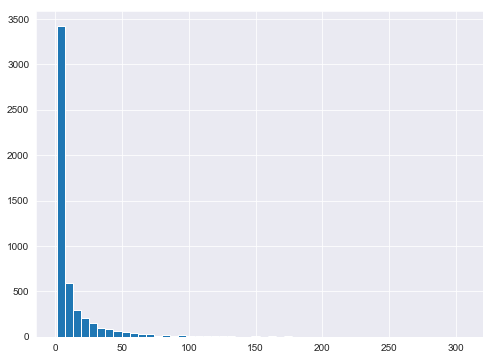

In [22]:
plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
score_mean_count['score_counts'].hist(bins=50)  

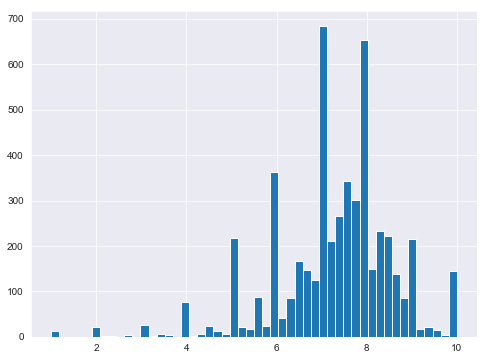

In [24]:
plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
score_mean_count['score'].hist(bins=50)  

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 576x432 with 0 Axes>

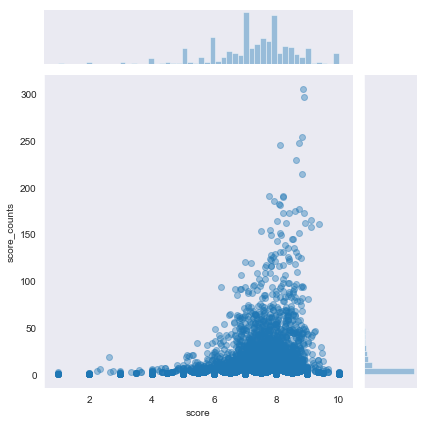

In [26]:
plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
sns.jointplot(x='score', y='score_counts', data=score_mean_count, alpha=0.4)  